In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path as osp
import sys

sys.path.insert(0,'src')

In [2]:
from data_funcs import plot_data

## Data

### Fuel Moisture Background

* Fuel moisture content (FM) is a critical component of wildfire susceptibility and fire spread.
* Dry fuels burn more readily, and wetter fuels burn more slowly or not at all. Atmospheric conditions affect FM in a variety of ways.

![](https://www.wfas.net/images/firedanger/fm_10.png)

---
* Temperature is a key component of FM; warmer temperatures dry out fuels, with other factors being held constant.
* Relative humidity (RH) is another key component of FM; more moisture in the air generally leads to more moisture in fuels.
* Higher wind speeds lead to drier fuels. 
* Solar radiation dries out fuels. Cloudy days with little direct solar radiation will generally lead to higher FM conditions. 

The table below summarizes the atmospheric variables used in this project to model FM. All of these variables are defined at the surface level, they have various other units and definitions at higher altitudes.

| Name              | Units  |
|-------------------|--------|
| Air Temperature   | K    | 
| Relative Humidity | %    |
| Precipitation     | mm/h |
| Wind Speed        | m/s  |
| Solar Radiation   | kWh/m2 |

---
* Researchers often choose to model dead fuel moisture
* Dead fuel moisture is divided into different classes based on how quickly the material responds to changes in atmospheric conditions.

![](images/fm_types.png)

Source: NOAA https://www.ncei.noaa.gov/access/monitoring/dyk/deadfuelmoisture#:~:text=Fuel%20moisture%20is%20a%20measure,content%20would%20be%20zero%20percent.

---
The National Oceanic and Atmospheric Administration (NOAA) operates Remote Automatic Weather Stations (RAWS) across the country to measure hourly FM and other associated environmental variables.

![](images/raws_stations.png)

### Visualizing Fuel Moisture

The plot below shows 1 week of FM observations. The x-axis is arranged in 24-hour periods. Notice the clear cyclical pattern throughout a day where the highs and lows of FM occur with 24-hour periods. There was zero rainfall at this station over this week, so the patterns of FM are relatively smooth.

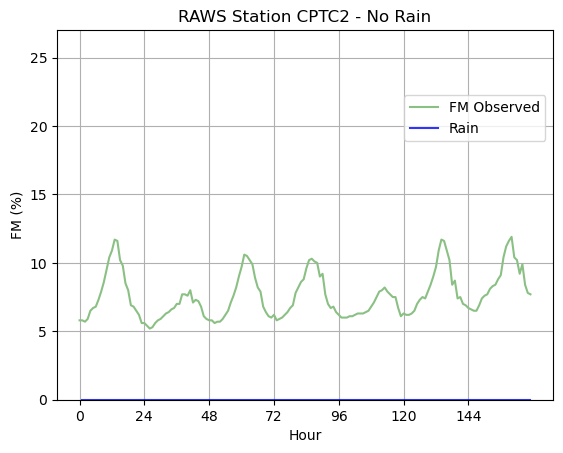

In [3]:
dat = pd.read_pickle('data/raws_dat.pickle') # all RAWS observations

dat = dat['CPTC2'] # restrict to one station for visualization

hours = 24*30 # one month of data

plt.plot(dat['fm'][0:24*7], linestyle='-',c='#8BC084',label='FM Observed')
plt.plot(dat['rain'][0:24*7], c='b',label='Rain', alpha=.8)
plt.legend()
plt.ylabel("FM (%)")
plt.xlabel("Hour")
plt.ylim(0, 27)
plt.xticks(range(0, 24*7, 24))
plt.legend(loc=(.7, .7))
plt.title("RAWS Station CPTC2 - No Rain")
plt.grid()

In another time period at the same location, there are several rainfall instances. The rain comes in short bursts and there are associated spikes in the FM.

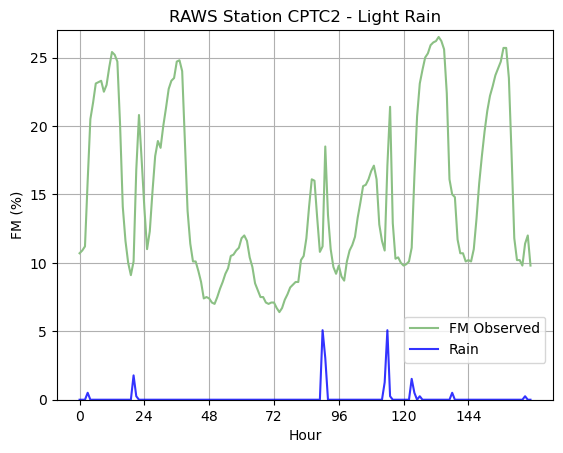

In [4]:
plt.plot(dat['fm'][24*14:24*21], linestyle='-',c='#8BC084',label='FM Observed')
plt.plot(dat['rain'][24*14:24*21], c='b',label='Rain', alpha=.8)
plt.legend()
plt.ylabel("FM (%)")
plt.xlabel("Hour")
plt.xticks(range(0, 24*7, 24))
plt.ylim(0, 27)
plt.legend(loc=(.7, .1))
plt.title("RAWS Station CPTC2 - Light Rain")
plt.grid()

Temperature and RH both affect fuel moisture, but they also strongly effect each other. The plot below shows a month of data at the same RAWS station location. The relationships between temperature and RH with fuel moisture are not at all apparent.

Text(0.5, 0, 'Temp (deg K)')

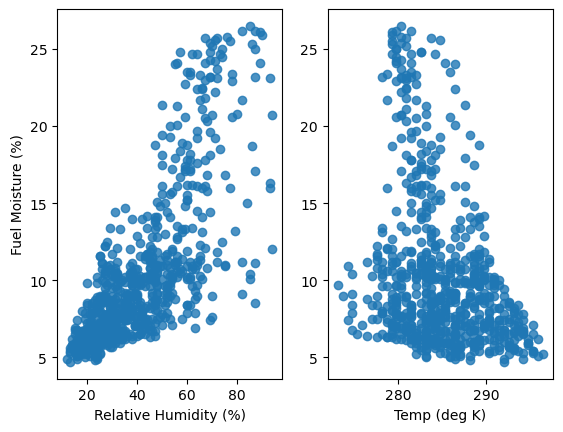

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(dat['rh'][0:hours], dat['fm'][0:hours], alpha=.8)
ax1.set_ylabel("Fuel Moisture (%)")
ax1.set_xlabel("Relative Humidity (%)")
ax2.scatter(dat['temp'][0:hours], dat['fm'][0:hours], alpha=.8)
ax2.set_xlabel("Temp (deg K)")

Researhers have developed the concept of Equilibrium Moisture Content to better understand the relationship between FM, RH, and temperature. Equilibrium Moisture Content is the theoretical FM if a fuel was left exposed to the same atmospheric conditions for a long time. The plots below show the relationship with Equilibrium Moisture for the same time period as the plot above.

Text(0.5, 0, 'Temp (deg K)')

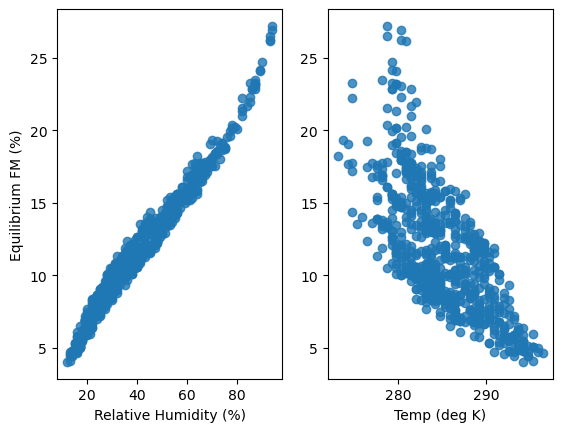

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(dat['rh'][0:hours], dat['Ew'][0:hours], alpha=.8)
ax1.set_ylabel("Equilibrium FM (%)")
ax1.set_xlabel("Relative Humidity (%)")
ax2.scatter(dat['temp'][0:hours], dat['Ew'][0:hours], alpha=.8)
ax2.set_xlabel("Temp (deg K)")

In the plot below, we see how the FM observation lags behind the equilibrium values. It tries to "chase" them over time, but the target is moving.

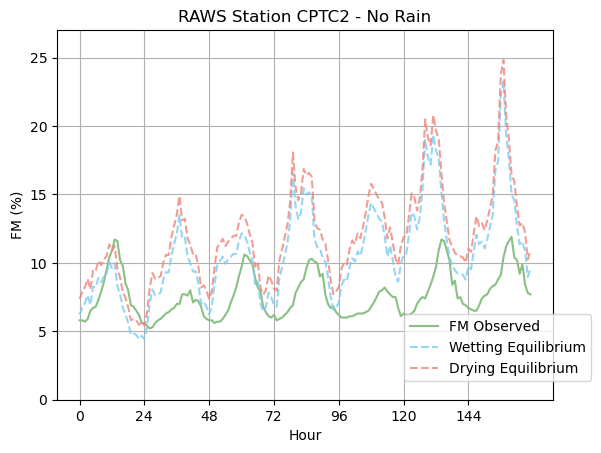

In [7]:
plt.plot(dat['fm'][0:24*7], linestyle='-',c='#8BC084',label='FM Observed')
plt.plot(dat['Ew'][0:24*7],label='Wetting Equilibrium', linestyle='--',c='#7CCCEF', alpha=.8)
plt.plot(dat['Ed'][0:24*7],label='Drying Equilibrium', linestyle='--',c='#EF847C', alpha=.8)
plt.legend()
plt.ylabel("FM (%)")
plt.xlabel("Hour")
plt.ylim(0, 27)
plt.xticks(range(0, 24*7, 24))
plt.legend(loc=(.7, .05))
plt.title("RAWS Station CPTC2 - No Rain")
plt.grid()

## References

* Open Wildland Fire Modeling E Community. https://wiki.openwfm.org/wiki/
* National Wildfire Coordinating Group (NWCG). https://www.nwcg.gov/course/ffm/
* *Dead Fuel Moisture*, NOAA National Centers for Environmental Information. https://www.ncei.noaa.gov/access/monitoring/dyk/deadfuelmoisture